In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


#Import libraries

In [4]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.optim as optim
import random
import torchvision.datasets as dsets
import torchvision.transforms as transforms #should be used to convert images to pytorch tensors


#GPU Setting

In [5]:
device = 'cuda' if torch.cuda.is_available else 'cpu'

In [6]:
if device == 'cuda':
  torch.cuda.torch.manual_seed(777) #random data sample is the same

#Hyperparameters Setting
hyperparameters:
1. Learning rate
2. epochs
3. batch size

In [7]:
#runs faster with lower training epoch and larger batch size and learning rate
training_epoch = 10
batch_size = 2048   #2^10
learning_rate = 0.1

#Dataset Loading

In [8]:
mnist_train = dsets.MNIST(root='/content/drive/MyDrive/CSCE464/datasets/MNIST',
                          train= True,
                          transform= transforms.ToTensor(),
                          download= True)

mnist_test = dsets.MNIST(root='/content/drive/MyDrive/CSCE464/datasets/MNIST',
                          train= False,
                          transform= transforms.ToTensor(),
                          download= True)

In [9]:
data_loader = torch.utils.data.DataLoader(dataset= mnist_train,
                                          batch_size= batch_size,
                                          shuffle = True,
                                          drop_last = True)

# SoftMax model construction

In [10]:
class SoftmaxClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(784, 10) #to update weight and bias (batch_size x dimension = (1024 x 784)) * (784 x 10) = (_ x 10)
    self.softmax = nn.Softmax()

  def forward(self, x):
    return self.softmax(self.linear(x))

In [11]:
model = SoftmaxClassifier().to(device) #Send the model to GPY

In [12]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#Model Training

In [13]:
for epoch in range(training_epoch):
  avg_cost = 0
  total_batch = len(data_loader)

  for X, Y in data_loader:
    X = X.view(-1, 28*28).to(device) #reduce data to 2D
    Y = Y.to(device) #dependent variable does not need to be reduced
    hypothesis = model(X).to(device)
    cost = F.cross_entropy(hypothesis, Y).to(device)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    avg_cost += cost / total_batch

  print("Epoch: ", epoch+1, "Cost: {:.5f}".format(avg_cost))

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Epoch:  1 Cost: 2.27688
Epoch:  2 Cost: 2.20962
Epoch:  3 Cost: 2.12192
Epoch:  4 Cost: 2.03232
Epoch:  5 Cost: 1.96776
Epoch:  6 Cost: 1.92078
Epoch:  7 Cost: 1.88733
Epoch:  8 Cost: 1.86404
Epoch:  9 Cost: 1.84706
Epoch:  10 Cost: 1.83351


#Test the model

In [21]:
with torch.no_grad():
  x_test = mnist_test.test_data.view(-1, 28*28).float().to(device)
  y_test = mnist_test.test_labels.to(device)

  pred = model(x_test)
  correct_prediction = torch.torch.argmax(pred, axis=1) == y_test
  accuracy = correct_prediction.float().mean()
  print("Testing Accuracy {:.2f}".format(accuracy.item()*100))

Testing Accuracy 72.66


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


10000
7923
X_pred size:  1
Y_pred size:  1
Label of Y_pred:  8
Final prediction:  <built-in method item of Tensor object at 0x7db02d6889f0>


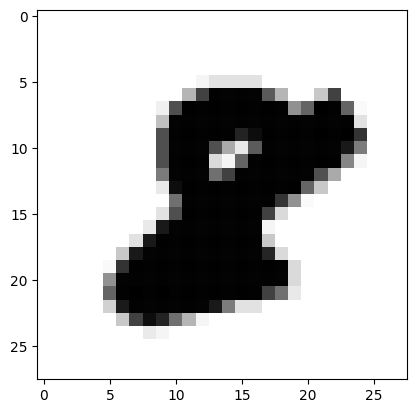

In [25]:
print(len(mnist_test))
r = random.randint(0, 9999)
print(r)

X_pred = mnist_test.test_data[r:r+1].view(-1, 28*28).float().to(device)
print("X_pred size: ", len(X_pred))

Y_pred = mnist_test.test_labels[r:r+1].to(device)
print("Y_pred size: ", len(Y_pred))

print("Label of Y_pred: ", Y_pred.item())
one_time_pred = model(X_pred)

print("Final prediction: ", torch.argmax(one_time_pred, axis=1).item)
plt.imshow(mnist_test.test_data[r:r+1].view(28, 28), cmap='Greys', interpolation='nearest')
plt.show()